In [26]:
import boto3
import pandas as pd
import dotenv 
import matplotlib.pyplot as plt

dotenv.load_dotenv()
s3 = boto3.client('s3')
cc = boto3.client('comprehend')

In [9]:
path = "./sample.csv"
df = pd.read_csv(path)
sentiments = []
for text in df['text']:
    response = cc.detect_sentiment(
        Text=text,
        LanguageCode='en'
    )
    sentiments.append(response['Sentiment'])
df['sentiment'] = sentiments
df


,textID,text,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),sentiment
0,910d626cd8,"Come on bell, RING. I want to go outside.",noon,60-70,Moldova,4033963,32850.0,123,POSITIVE
1,8560ce3f2e,Hey,morning,0-20,Bosnia and Herzegovina,3280819,51000.0,64,NEUTRAL
2,eca4006095,"I started X-Slimmer at eight this morning, it`...",morning,46-60,Ukraine,43733762,579320.0,75,NEGATIVE
3,5b34c6a158,"no, i do better with people i don`t know yo...",noon,60-70,Libya,6871292,1759540.0,4,NEGATIVE
4,4349a49444,the end when they sing this is me and when th...,noon,60-70,Uruguay,3473730,175020.0,20,POSITIVE
...,...,...,...,...,...,...,...,...,...
270,488ad3f353,"Had a nice concert yesterday. Nice location, n...",night,70-100,United Kingdom,67886011,241930.0,281,MIXED
271,a77df4a95a,I`m still up! Thank you all for praying (: AHA...,night,70-100,Algeria,43851044,2381740.0,18,POSITIVE
272,2f561da8bc,is new to twitter and has no friends here... o...,morning,0-20,Papua New Guinea,8947024,452860.0,20,NEUTRAL
273,7a02ca882d,Dads should ask their 22 year old sons before ...,morning,46-60,Burundi,11890784,25680.0,463,NEUTRAL


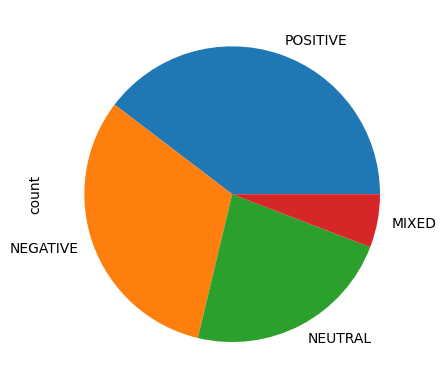

In [ ]:
df['sentiment'].value_counts().plot.pie()
plt.savefig('sentiment_visualization.jpg')

In [28]:
bucket_name = 'techcatalyst-raw'
key = 'Ben/SENTIMENT/'
s3.upload_file("sentiment_visualization.jpg", bucket_name, key+"sentiment_visualization.jpg")




In [29]:
df.to_parquet('sentiment_output.parquet')

In [30]:
s3.upload_file('sentiment_output.parquet', bucket_name, key+"sentiment_output.parquet")